In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
from matplotlib.ticker import PercentFormatter

notebook_path = os.path.abspath("E:\Git Repositories\DataAnalyticsKickstarterWS21-22\data")

csv_path = os.path.join(os.path.dirname(notebook_path), "data\ks-projects-201801.csv")


In [41]:
df = pd.read_csv (csv_path, low_memory=False)
print (df.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

In [42]:
df.head()


ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [72]:
### üBERSCHRIFT Graphik 'Verteilung der Dauer der Projekte auf alle'

In [43]:
#Berechnen der Projektdauer mit Datum aus Deadline und Launched
df_ProjektDauer = df[['deadline','launched']]
df_ProjektDauer = df_ProjektDauer.apply(pd.to_datetime)
df_ProjektDauer ['Projektdauer'] = (df_ProjektDauer['deadline'] - df_ProjektDauer['launched']).dt.days
df_ProjektDauer.head()



deadline            launched  Projektdauer
0 2015-10-09 2015-08-11 12:12:28            58
1 2017-11-01 2017-09-02 04:43:57            59
2 2013-02-26 2013-01-12 00:20:50            44
3 2012-04-16 2012-03-17 03:24:11            29
4 2015-08-29 2015-07-04 08:35:03            55

TypeError: 'float' object cannot be interpreted as an integer

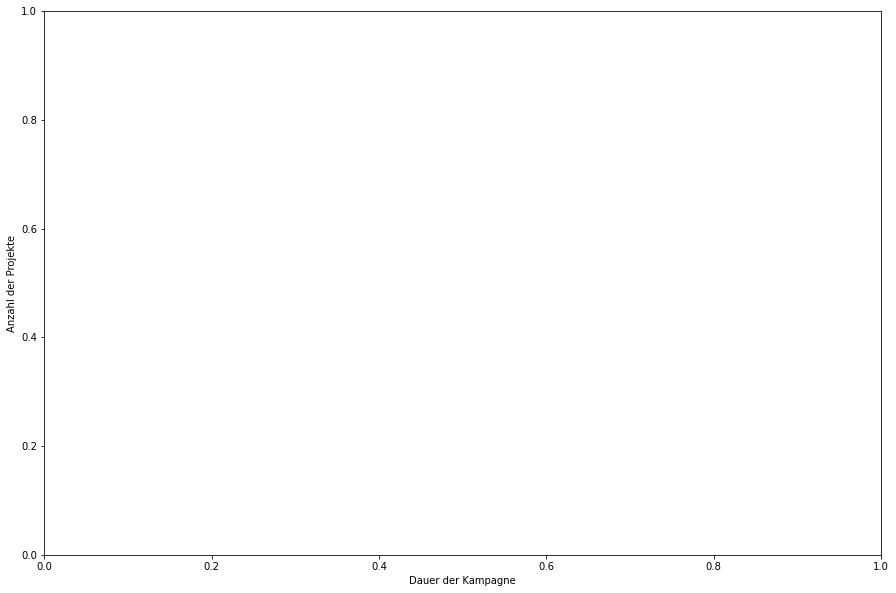

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Dauer der Kampagne')
ax.set_ylabel('Anzahl der Projekte')
ax.hist(df_ProjektDauer['Projektdauer'],weights=np.ones(len(df_ProjektDauer['Projektdauer']) / len(df_ProjektDauer['Projektdauer'])), bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()